# Henry Pham
# Project 10 - Predicting Heart Disease

In [1]:
# ---- Project 10 ----

## Introduction

In [2]:
# The objective of this project is to develop a precise and reliable predictive model for forecasting 
# the likelihood of heart disease in individuals, benefiting healthcare providers, patients, and public health initiatives. 
# Accurate predictions of heart disease risk enable early intervention, personalized healthcare planning,
# and the prevention of cardiovascular complications. 
# By harnessing advanced data analytics and medical data, 
# this project aims to provide valuable insights and predictive capabilities that can improve heart disease prevention and management.

## Data Sources

In [3]:
# Heart Disease: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## Required Libraries

In [4]:
# matplotlib: data visualization library for Python, widely used in data analysis, scientific research, engineering, and visualization tasks.
# numpy: numerical computations and data manipulation in Python.
# pandas: data manipulation, preprocessing, cleaning, transformation, exploration, and visualization.
# seaborn: a Python data visualization, widely used in data analysis, statistical modeling, and exploratory data analysis tasks.
# scikit-learn: also known as sklearn, provides an efficient framework for various machine learning tasks, such as classification, regression, clustering, dimensionality reduction, model selection, and preprocessing.
# scipy: a library for scientific computing in Python, provided a collection of mathematical algorithms and functionality such as optimization, interpolation, integration, linear algebra, signal processing, and statistics
# sqldf: a Python library that provides a SQL-like interface for querying pandas DataFrames using SQL syntax.

## Get Heart Disease Data

In [5]:
# Import few libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Read csv file using pandas
df = pd.read_csv('C:\\DSC680\\PracticeMachineLearning\\heart.csv')

## Data Cleaning

In [7]:
# Show few records
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Find shape of the dataset 

In [8]:
# Retrieve the dimensions of a DataFrame df
df.shape

(1025, 14)

In [9]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 1025
Number of Columns 14


## Get information About the dataset

In [10]:
# Provide a concise summary of the DataFrame df, including information about the index, column data types, 
# non-null values, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Check missing values

In [11]:
# Calculate the number of missing values (null values) in each column of the DataFrame df
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
# There is no missing values in the dataset.

## Check duplicates

In [13]:
# Count the number of duplicated rows in the DataFrame df
df.duplicated().sum()

723

In [14]:
# There are 723 duplicates in the dataframe

In [15]:
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

In [16]:
# Count the number of duplicated rows in the DataFrame df
df.duplicated().sum()

0

In [17]:
# Now there is no duplicates

## Get an overall stats summary

In [18]:
# Generate descriptive statistics of the numerical columns in a DataFrame.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Outliers Detection

In [19]:
# Show few records
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [20]:
# List columns
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [21]:
# Subset the data for the variable of chol
chol = df['chol']

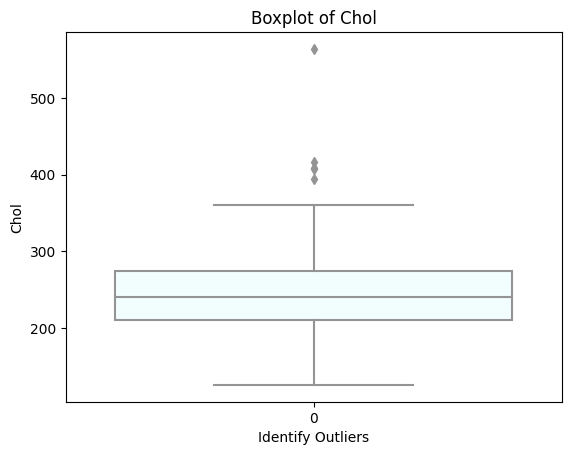

In [22]:
# Import seaborn and matplotlib libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of GRE score using seaborn
sns.boxplot(chol, color='azure')

# Add a title
plt.title("Boxplot of Chol")

# Label the x and y axes
plt.xlabel("Identify Outliers")
plt.ylabel("Chol")

# Show the plot
plt.show()

In [23]:
# I calculate the z-scores for each data point and determine if any values fall outside a certain threshold,
# values that are more than a few standard deviations away from the mean can be considered outliers.

In [24]:
# Calculate the mean, median, and standard deviation for Chol
mean = chol.mean()
median = chol.median()
std = chol.std()
# Define the threshold for outliers 
# which is set to more than 3 standard deviations away from the mean 
threshold = 3
# Calculate the z-scores for each data point.
# Subtracts the mean from each data point and then divides by the standard deviation to standardize the data.
# Calculating the z-scores, I can determine how far each data point deviates from the mean in terms of standard deviations.
# Positive z-scores indicate values above the mean, while negative z-scores indicate values below the mean.
z_scores = (chol - mean) / std

# Identify the outliers based on the threshold.
# The abs() function is used to take the absolute value of each z-score, 
# ensuring that both positive and negative deviations from the mean are considered.
# The resulting outliers are stored in the outliers variable, 
# which contains the subset of "chol" values that are identified as outliers 
# based on their z-scores exceeding the threshold of 3.
outliers = chol[abs(z_scores) > threshold]

# Print the identified outliers
print("Identified outliers:")
print(outliers)

Identified outliers:
123    417
158    564
179    409
450    407
Name: chol, dtype: int64


In [25]:
# There are 4 outliers in the chol column of the dataset

In [26]:
# Subset the data for the variable of trestbps
bps = df['trestbps']

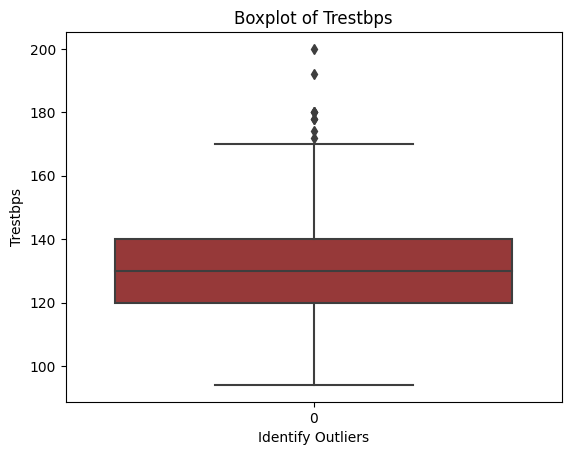

In [27]:
# Import seaborn and matplotlib libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of GRE score using seaborn
sns.boxplot(bps, color='brown')

# Add a title
plt.title("Boxplot of Trestbps")

# Label the x and y axes
plt.xlabel("Identify Outliers")
plt.ylabel("Trestbps")

# Show the plot
plt.show()

In [28]:
# I calculate the z-scores for each data point and determine if any values fall outside a certain threshold,
# values that are more than a few standard deviations away from the mean can be considered outliers.

In [29]:
# Calculate the mean, median, and standard deviation for Trestbps
mean = bps.mean()
median = bps.median()
std = bps.std()
# Define the threshold for outliers 
# which is set to more than 3 standard deviations away from the mean 
threshold = 3
# Calculate the z-scores for each data point.
# Subtracts the mean from each data point and then divides by the standard deviation to standardize the data.
# Calculating the z-scores, I can determine how far each data point deviates from the mean in terms of standard deviations.
# Positive z-scores indicate values above the mean, while negative z-scores indicate values below the mean.
z_scores = (bps - mean) / std

# Identify the outliers based on the threshold.
# The abs() function is used to take the absolute value of each z-score, 
# ensuring that both positive and negative deviations from the mean are considered.
# The resulting outliers are stored in the outliers variable, 
# which contains the subset of "bps" values that are identified as outliers 
# based on their z-scores exceeding the threshold of 3.
outliers = bps[abs(z_scores) > threshold]

# Print the identified outliers
print("Identified outliers:")
print(outliers)

Identified outliers:
151    192
175    200
Name: trestbps, dtype: int64


In [30]:
# There are 2 outliers in the trestbps column of the dataset

## Data Processing

In [31]:
# These lines initialize two empty lists, 
# category_val to store the names of columns with a small number of unique values (categorical variables), 
# and cont_val to store the names of columns with a large number of unique values (continuous variables).
category_val = []
cont_val = []
# This loop iterates through each column in the DataFrame df
for column in df.columns:
    # If the number of unique values is less than or equal to 10, 
    # it appends the column name to the category_val list, indicating that it contains categorical data.
    if df[column].nunique() <=10:
        category_val.append(column)
    # Otherwise, it appends the column name to the cont_val list, indicating that it likely contains continuous data.
    else:
        cont_val.append(column)

In [32]:
# Show the result for category
category_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [33]:
# Show the result for continuous data
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

## Encoding Categorical Data

In [34]:
# These lines remove the columns 'sex' and 'target' from the list category_val.
# these columns are not considered categorical variables for one-hot encoding
category_val.remove('sex')
category_val.remove('target')
# This line applies one-hot encoding to the DataFrame df for the columns listed in category_val
# The pd.get_dummies() function is used to create dummy variables for each category in these columns
# The columns=category_val parameter specifies the columns to encode
# drop_first=True is used to drop the first level of each categorical variable 
# to avoid multicollinearity in the resulting dataset.
df = pd.get_dummies(df,columns = category_val,drop_first=True)

In [35]:
# Show few records
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


## Feature Scaling

In [36]:
# This line imports the StandardScaler class from the sklearn.preprocessing module.
from sklearn.preprocessing import StandardScaler
# This line creates an instance of the StandardScaler class and assigns it to the variable sc. 
sc = StandardScaler()

In [37]:
# This line applies the fit_transform() method of the StandardScaler object sc to the continuous variables selected 
# by cont_val in the DataFrame df
df[cont_val] = sc.fit_transform(df[cont_val])

In [38]:
# Show few records
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


## Store Feature Matrix In X and Response(Target) In Vector y

In [39]:
# This line creates a new DataFrame X by dropping the column labeled 'target' from the original DataFrame df
X = df.drop('target',axis=1)
# This line creates a Series y containing only the values from the column labeled 'target' in the original DataFrame df.
# The resulting Series y contains the values of the 'target' column, which is the target variable I want to predict.
y = df['target']

## Splitting The Dataset Into The Training Set And Test Set

In [40]:
# Import the train_test_split function from the sklearn.model_selection module and 
# then splits the dataset into training and testing sets.
from sklearn.model_selection import train_test_split
# X: This is the DataFrame containing the features (independent variables).
# y: This is the Series containing the target variable (dependent variable).
# test_size=0.20: This parameter specifies the proportion of the dataset that should be included in the test split. 
# In this case, it's set to 0.20, meaning that 20% of the data will be used for testing, 
# and the remaining 80% will be used for training.
# random_state=42: This parameter sets the random seed for reproducibility
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [41]:
# Show the result of X_train
X_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
163,-0.710788,1,-0.433587,0.532247,0.718568,-0.468334,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
291,0.396267,1,-0.205463,0.241930,-0.855851,1.687716,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
280,-1.042904,0,-0.091401,-0.241930,1.112172,-0.382092,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
85,-1.153610,1,-0.661712,-0.512893,0.893503,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
239,0.839089,0,1.049221,-0.048386,0.193761,0.307844,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1.392616,1,-0.661712,-0.183867,-3.436149,-0.037124,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
77,0.949794,1,0.478910,-1.151589,-0.243577,2.550136,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
125,0.617678,0,1.049221,-0.125804,0.937237,-0.123366,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
522,1.392616,0,1.163283,0.590310,0.980971,-0.899544,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0


## Import The models

In [42]:
# Import few libraries
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score

## Model Training & Evaluation

In [43]:
# This line creates an instance of the LogisticRegression class from scikit-learn's linear_model module
lr = LogisticRegression()
# This line trains the logistic regression model (lr) on the training data (X_train and y_train) using the fit method
lr.fit(X_train,y_train)
# This line uses the trained logistic regression model (lr) to predict the labels for the test data (X_test) using the predict method. 
y_pred_lr= lr.predict(X_test)
# Print the result
print('Accuacy score of lr:', accuracy_score(y_test,y_pred_lr))
print('Precision score of lr:', precision_score(y_test,y_pred_lr))
print('Recall score of lr:', recall_score(y_test,y_pred_lr))
print('F1 score of lr:', f1_score(y_test,y_pred_lr))

Accuacy score of lr: 0.7868852459016393
Precision score of lr: 0.75
Recall score of lr: 0.8275862068965517
F1 score of lr: 0.7868852459016394


In [44]:
# Repeat the same for SVM
svm = svm.SVC()
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
print('Accuacy score of svm:', accuracy_score(y_test,y_pred_svm))
print('Precision score of svm:', precision_score(y_test,y_pred_svm))
print('Recall score of svm:', recall_score(y_test,y_pred_svm))
print('F1 score of svm:', f1_score(y_test,y_pred_svm))

Accuacy score of svm: 0.8032786885245902
Precision score of svm: 0.7575757575757576
Recall score of svm: 0.8620689655172413
F1 score of svm: 0.8064516129032258


In [45]:
# Repeat the same for KNN
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print('Accuacy score of knn:', accuracy_score(y_test,y_pred_knn))
print('Precision score of knn:', precision_score(y_test,y_pred_knn))
print('Recall score of knn:', recall_score(y_test,y_pred_knn))
print('F1 score of knn:', f1_score(y_test,y_pred_knn))

Accuacy score of knn: 0.8032786885245902
Precision score of knn: 0.8148148148148148
Recall score of knn: 0.7586206896551724
F1 score of knn: 0.7857142857142857


In [46]:
# Repeat the same for Decision Tree
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
print('Accuacy score of dt:', accuracy_score(y_test,y_pred_dt))
print('Precision score of dt:', precision_score(y_test,y_pred_dt))
print('Recall score of dt:', recall_score(y_test,y_pred_dt))
print('F1 score of dt:', f1_score(y_test,y_pred_dt))

Accuacy score of dt: 0.7377049180327869
Precision score of dt: 0.6756756756756757
Recall score of dt: 0.8620689655172413
F1 score of dt: 0.7575757575757576


In [47]:
# Repeat the same for RF
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print('Accuacy score of rf:', accuracy_score(y_test,y_pred_rf))
print('Precision score of rf:', precision_score(y_test,y_pred_rf))
print('Recall score of rf:', recall_score(y_test,y_pred_rf))
print('F1 score of rf:', f1_score(y_test,y_pred_rf))

Accuacy score of rf: 0.7704918032786885
Precision score of rf: 0.7027027027027027
Recall score of rf: 0.896551724137931
F1 score of rf: 0.787878787878788


In [48]:
# Repeat the same for GBC
gr = GradientBoostingClassifier()
gr.fit(X_train,y_train)
y_pred_gr = gr.predict(X_test)
print('Accuacy score of gr:', accuracy_score(y_test,y_pred_gr))
print('Precision score of gr:', precision_score(y_test,y_pred_gr))
print('Recall score of gr:', recall_score(y_test,y_pred_gr))
print('F1 score of gr:', f1_score(y_test,y_pred_gr))

Accuacy score of gr: 0.7540983606557377
Precision score of gr: 0.6842105263157895
Recall score of gr: 0.896551724137931
F1 score of gr: 0.7761194029850746


In [49]:
# Create a DataFrame using a dictionary where the keys are column names ('Models' and 'ACC_SCORE') 
# and the values are lists containing the corresponding data.
df_acc = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                           'ACC_SCORE':[accuracy_score(y_test,y_pred_lr),
                                       accuracy_score(y_test,y_pred_svm),
                                       accuracy_score(y_test,y_pred_knn),
                                       accuracy_score(y_test,y_pred_dt),
                                       accuracy_score(y_test,y_pred_rf),
                                       accuracy_score(y_test,y_pred_gr)]})

In [50]:
df_acc

,Models,ACC_SCORE
0,LR,0.786885
1,SVC,0.803279
2,KNN,0.803279
3,DT,0.737705
4,RF,0.770492
5,GBC,0.754098


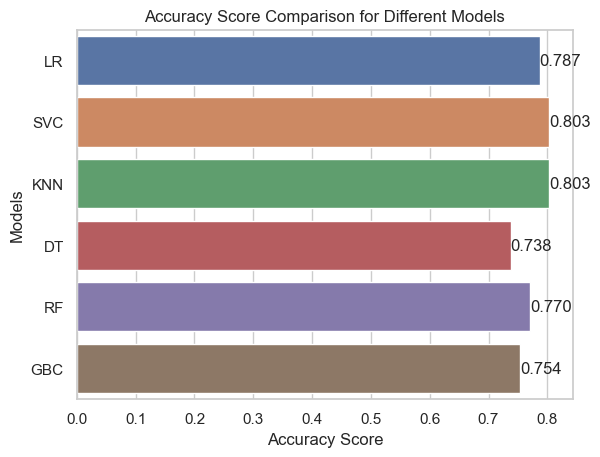

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains your data
sns.set(style="whitegrid")  # Set the style of the plot

# Create the bar plot
ax = sns.barplot(x='ACC_SCORE', y='Models', data=df_acc)

# Adding labels and title
plt.xlabel('Accuracy Score')
plt.ylabel('Models')
plt.title('Accuracy Score Comparison for Different Models')

# Add text labels for each bar
for index, row in df_acc.iterrows():
    ax.text(row['ACC_SCORE'], index, f'{row["ACC_SCORE"]:.3f}', va='center')

# Display the plot
plt.show()

In [52]:
# Create a DataFrame using a dictionary where the keys are column names ('Models' and 'Precision Score') 
# and the values are lists containing the corresponding data.
df_prec = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                           'Precision_SCORE':[precision_score(y_test,y_pred_lr),
                                       precision_score(y_test,y_pred_svm),
                                       precision_score(y_test,y_pred_knn),
                                       precision_score(y_test,y_pred_dt),
                                       precision_score(y_test,y_pred_rf),
                                       precision_score(y_test,y_pred_gr)]})

In [53]:
df_prec

,Models,Precision_SCORE
0,LR,0.750000
1,SVC,0.757576
2,KNN,0.814815
3,DT,0.675676
4,RF,0.702703
5,GBC,0.684211


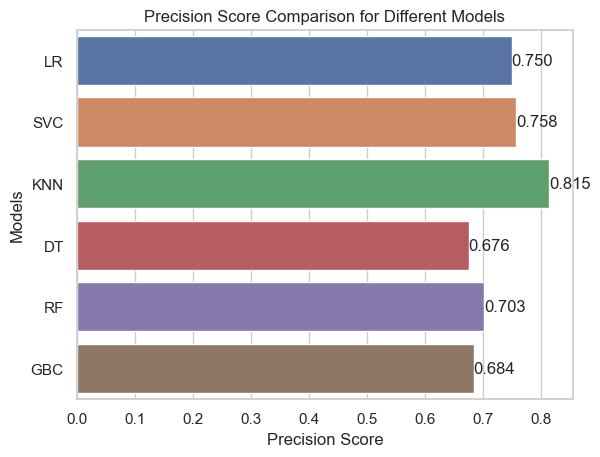

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains your data
sns.set(style="whitegrid")  # Set the style of the plot

# Create the bar plot
ax = sns.barplot(x='Precision_SCORE', y='Models', data=df_prec)

# Adding labels and title
plt.xlabel('Precision Score')
plt.ylabel('Models')
plt.title('Precision Score Comparison for Different Models')

# Add text labels for each bar
for index, row in df_prec.iterrows():
    ax.text(row['Precision_SCORE'], index, f'{row["Precision_SCORE"]:.3f}', va='center')

# Display the plot
plt.show()

In [55]:
# Create a DataFrame using a dictionary where the keys are column names ('Models' and 'Recall Score') 
# and the values are lists containing the corresponding data.
df_rec = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                           'Recall_SCORE':[recall_score(y_test,y_pred_lr),
                                       recall_score(y_test,y_pred_svm),
                                       recall_score(y_test,y_pred_knn),
                                       recall_score(y_test,y_pred_dt),
                                       recall_score(y_test,y_pred_rf),
                                       recall_score(y_test,y_pred_gr)]})

In [56]:
# Show the result
df_rec

,Models,Recall_SCORE
0,LR,0.827586
1,SVC,0.862069
2,KNN,0.758621
3,DT,0.862069
4,RF,0.896552
5,GBC,0.896552


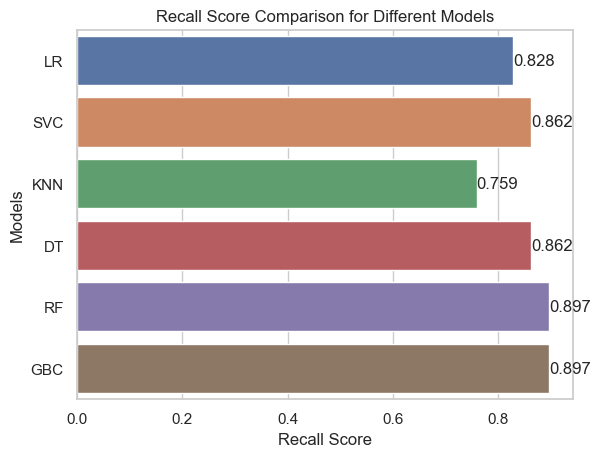

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains your data
sns.set(style="whitegrid")  # Set the style of the plot

# Create the bar plot
ax = sns.barplot(x='Recall_SCORE', y='Models', data=df_rec)

# Adding labels and title
plt.xlabel('Recall Score')
plt.ylabel('Models')
plt.title('Recall Score Comparison for Different Models')

# Add text labels for each bar
for index, row in df_rec.iterrows():
    ax.text(row['Recall_SCORE'], index, f'{row["Recall_SCORE"]:.3f}', va='center')

# Display the plot
plt.show()

In [58]:
# Create a DataFrame using a dictionary where the keys are column names ('Models' and 'F1 Score') 
# and the values are lists containing the corresponding data.
df_f1 = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                           'F1_SCORE':[f1_score(y_test,y_pred_lr),
                                       f1_score(y_test,y_pred_svm),
                                       f1_score(y_test,y_pred_knn),
                                       f1_score(y_test,y_pred_dt),
                                       f1_score(y_test,y_pred_rf),
                                       f1_score(y_test,y_pred_gr)]})

In [59]:
# Show the result
df_f1

,Models,F1_SCORE
0,LR,0.786885
1,SVC,0.806452
2,KNN,0.785714
3,DT,0.757576
4,RF,0.787879
5,GBC,0.776119


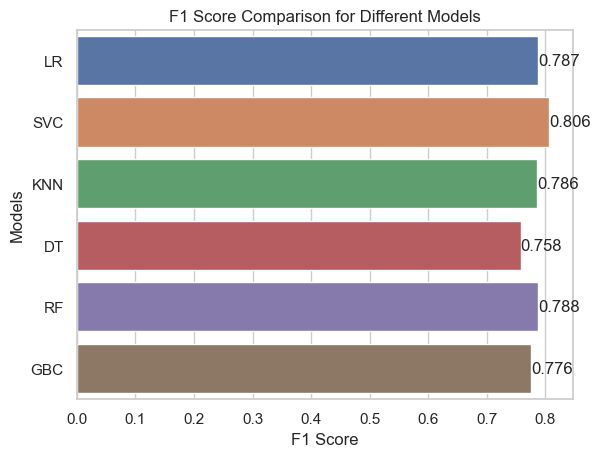

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains your data
sns.set(style="whitegrid")  # Set the style of the plot

# Create the bar plot
ax = sns.barplot(x='F1_SCORE', y='Models', data=df_f1)

# Adding labels and title
plt.xlabel('F1 Score')
plt.ylabel('Models')
plt.title('F1 Score Comparison for Different Models')

# Add text labels for each bar
for index, row in df_f1.iterrows():
    ax.text(row['F1_SCORE'], index, f'{row["F1_SCORE"]:.3f}', va='center')

# Display the plot
plt.show()

In [61]:
# Random Forest model is preferred

## Save The Model

In [62]:
# This line creates an instance of the RandomForestClassifier class from the ensemble module in scikit-learn.
rf = RandomForestClassifier()
# This line trains (fits) the RandomForestClassifier model on the entire dataset X and 
# corresponding target variable y using the fit method.
rf.fit(X,y)

RandomForestClassifier()

In [63]:
# Import the joblib library
import joblib
# This line saves the trained RandomForestClassifier model (rf) to a file named 'Heart_Disease_model'. 
joblib.dump(rf,'Heart_Disease_model')

['Heart_Disease_model']

In [64]:
# This line loads the previously saved model from the file 'Heart_Disease_model' and assigns it to the variable 'model'. 
# I can now use this model to make predictions on new data 
model = joblib.load('Heart_Disease_model')